In [1]:
import xarray as xr
from pathlib import Path

In [2]:
downloads = Path('/Users/JonnieBarnsley/Downloads/')

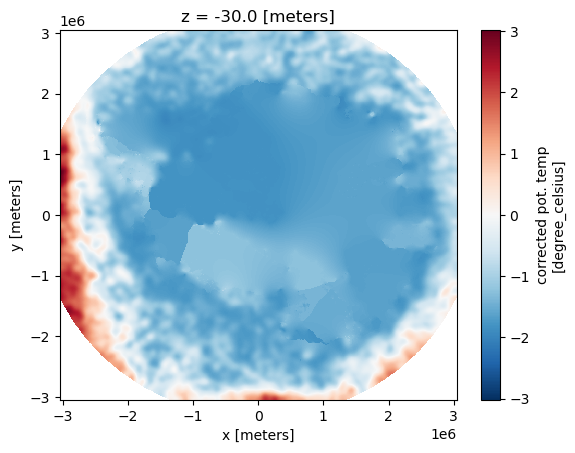

In [5]:
obs = xr.open_dataset(downloads / 'obs_temperature_1995-2017_8km_x_60m.nc')
obs.isel(z=0).temperature.plot()

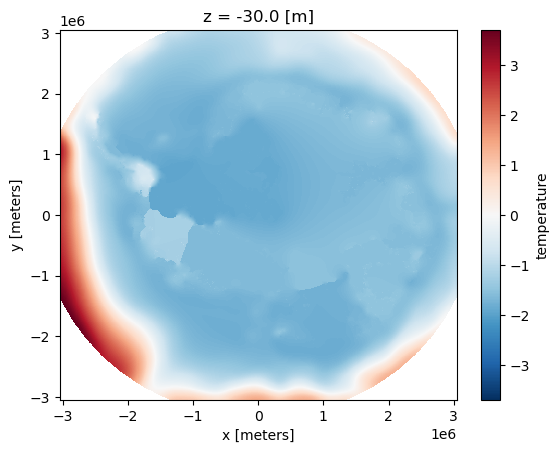

In [8]:
output = xr.open_dataset(downloads / 'output' / \
    '/Users/jonniebarnsley/Downloads/output/UKESM1-0-LL_temperature_8km_x_60m.nc')
climatology = output.mean(dim='time')
climatology.isel(z=0).temperature.plot()

In [19]:
anomalies = output - climatology
my_anomaly = anomalies.isel(z=0, time=-1).temperature

In [20]:
computed_anomalies = xr.open_dataset('/Users/jonniebarnsley/Downloads/anomaly_1995-2014/UKESM1-0-LL_temperature_8km_x_60m.nc')
their_anomaly = computed_anomalies.isel(z=0, time=-1).temperature

In [22]:
(my_anomaly - their_anomaly).max()

<xarray.DataArray 'temperature' ()> Size: 8B
array(0.)
Coordinates:
    time     object 8B 2014-01-01 00:00:00
    z        float64 8B -30.0

In [24]:
output2 = xr.open_dataset(downloads / '2015-2034' / 'output' / 'UKESM1-0-LL_temperature_8km_x_60m.nc')
anomalies2 = output2 - climatology
my_anomaly2 = anomalies2.isel(z=0, time=-1).temperature

In [25]:
computed_anomalies2 = xr.open_dataset(downloads / '2015-2034' / 'anomaly_1995-2014' / 'UKESM1-0-LL_temperature_8km_x_60m.nc')
their_anomaly2 = computed_anomalies2.isel(z=0, time=-1).temperature

In [26]:
(my_anomaly2 - their_anomaly2).max()

<xarray.DataArray 'temperature' ()> Size: 8B
array(0.)
Coordinates:
    time     object 8B 2034-01-01 00:00:00
    z        float64 8B -30.0

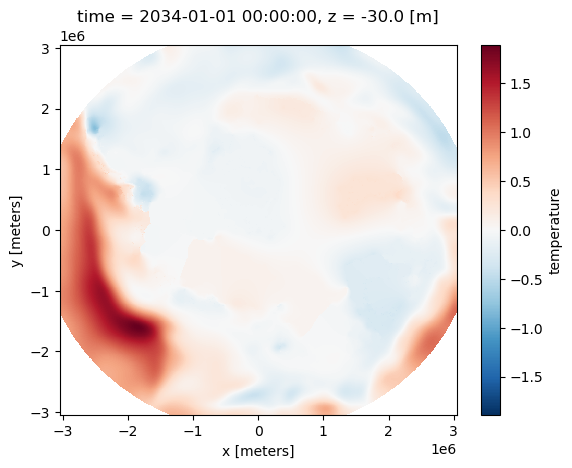

In [27]:
my_anomaly2.plot()

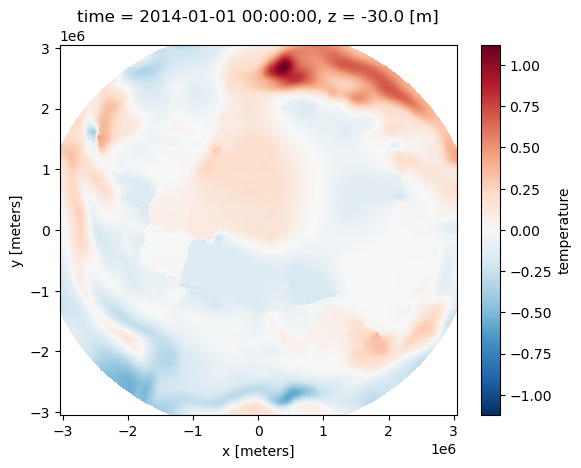

In [28]:
my_anomaly.plot()

In [29]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/UKESM1-0-LL_thermal_forcing_8km_x_60m_2295-2300.nc')
file

/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_34875/982170357.py:1: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  file = xr.open_dataset('/Users/jonniebarnsley/Downloads/UKESM1-0-LL_thermal_forcing_8km_x_60m_2295-2300.nc')


<xarray.Dataset> Size: 834MB
Dimensions:          (x: 761, y: 761, z: 30, nbounds: 2, time: 6)
Coordinates:
  * x                (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
  * y                (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
  * z                (z) float64 240B -30.0 -90.0 -150.0 ... -1.71e+03 -1.77e+03
  * time             (time) object 48B 2295-01-01 00:00:00 ... 2300-01-01 00:...
Dimensions without coordinates: nbounds
Data variables:
    z_bnds           (z, nbounds) float64 480B ...
    thermal_forcing  (time, z, y, x) float64 834MB ...

In [37]:
file.time.values[0].year

2295

In [41]:
year = file.sel(time=file.time.values[0])

In [46]:
year = year.drop_vars('time')

In [47]:
year

<xarray.Dataset> Size: 139MB
Dimensions:          (x: 761, y: 761, z: 30, nbounds: 2)
Coordinates:
  * x                (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
  * y                (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
  * z                (z) float64 240B -30.0 -90.0 -150.0 ... -1.71e+03 -1.77e+03
Dimensions without coordinates: nbounds
Data variables:
    z_bnds           (z, nbounds) float64 480B ...
    thermal_forcing  (z, y, x) float64 139MB ...

In [54]:
for i, z in enumerate(file.z):
    thermal_z = file.sel(z=z)
    file[f'thermal_forcing00{i:02d}'] = thermal_z.thermal_forcing

In [52]:
test = xr.open_dataset('/Users/jonniebarnsley/Downloads/bisicles_compatible_2300.nc')
test

<xarray.Dataset> Size: 142MB
Dimensions:               (x: 768, y: 768)
Coordinates:
  * x                     (x) float64 6kB 4e+03 1.2e+04 ... 6.132e+06 6.14e+06
  * y                     (y) float64 6kB 4e+03 1.2e+04 ... 6.132e+06 6.14e+06
Data variables: (12/32)
    crs                   int32 4B ...
    time_of_array         float64 8B ...
    thermal_forcing_0000  (y, x) float64 5MB ...
    thermal_forcing_0001  (y, x) float64 5MB ...
    thermal_forcing_0002  (y, x) float64 5MB ...
    thermal_forcing_0003  (y, x) float64 5MB ...
    ...                    ...
    thermal_forcing_0024  (y, x) float64 5MB ...
    thermal_forcing_0025  (y, x) float64 5MB ...
    thermal_forcing_0026  (y, x) float64 5MB ...
    thermal_forcing_0027  (y, x) float64 5MB ...
    thermal_forcing_0028  (y, x) float64 5MB ...
    thermal_forcing_0029  (y, x) float64 5MB ...
Attributes: (12/39)
    Conventions:         CF-1.7
    component_0:         thermal_forcing_0000
    component_1:         thermal_forcing_0001
    component_10:        thermal_forcing_0010
    component_11:        thermal_forcing_0011
    component_12:        thermal_forcing_0012
    ...                  ...
    num_components:      30
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  8000.0
    Conversion_history:  slc removed this feature to see if it was causing chaos

In [56]:
file = file.drop_vars('thermal_forcing')
file

<xarray.Dataset> Size: 834MB
Dimensions:              (x: 761, y: 761, z: 30, nbounds: 2, time: 6)
Coordinates:
  * x                    (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.04e+06
  * y                    (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.04e+06
  * z                    (z) float64 240B -30.0 -90.0 ... -1.71e+03 -1.77e+03
  * time                 (time) object 48B 2295-01-01 00:00:00 ... 2300-01-01...
Dimensions without coordinates: nbounds
Data variables: (12/31)
    z_bnds               (z, nbounds) float64 480B ...
    thermal_forcing0000  (time, y, x) float64 28MB ...
    thermal_forcing0001  (time, y, x) float64 28MB ...
    thermal_forcing0002  (time, y, x) float64 28MB ...
    thermal_forcing0003  (time, y, x) float64 28MB ...
    thermal_forcing0004  (time, y, x) float64 28MB ...
    ...                   ...
    thermal_forcing0024  (time, y, x) float64 28MB ...
    thermal_forcing0025  (time, y, x) float64 28MB ...
    thermal_forcing0026  (time, y, x) float64 28MB ...
    thermal_forcing0027  (time, y, x) float64 28MB ...
    thermal_forcing0028  (time, y, x) float64 28MB ...
    thermal_forcing0029  (time, y, x) float64 28MB ...

In [58]:
file.z_bnds.values

array([[   -0.,   -60.],
       [  -60.,  -120.],
       [ -120.,  -180.],
       [ -180.,  -240.],
       [ -240.,  -300.],
       [ -300.,  -360.],
       [ -360.,  -420.],
       [ -420.,  -480.],
       [ -480.,  -540.],
       [ -540.,  -600.],
       [ -600.,  -660.],
       [ -660.,  -720.],
       [ -720.,  -780.],
       [ -780.,  -840.],
       [ -840.,  -900.],
       [ -900.,  -960.],
       [ -960., -1020.],
       [-1020., -1080.],
       [-1080., -1140.],
       [-1140., -1200.],
       [-1200., -1260.],
       [-1260., -1320.],
       [-1320., -1380.],
       [-1380., -1440.],
       [-1440., -1500.],
       [-1500., -1560.],
       [-1560., -1620.],
       [-1620., -1680.],
       [-1680., -1740.],
       [-1740., -1800.]])

In [59]:
print(' '.join(['thermal_forcing00'+f'{i:02d}' for i in range(30)]))

thermal_forcing0000 thermal_forcing0001 thermal_forcing0002 thermal_forcing0003 thermal_forcing0004 thermal_forcing0005 thermal_forcing0006 thermal_forcing0007 thermal_forcing0008 thermal_forcing0009 thermal_forcing0010 thermal_forcing0011 thermal_forcing0012 thermal_forcing0013 thermal_forcing0014 thermal_forcing0015 thermal_forcing0016 thermal_forcing0017 thermal_forcing0018 thermal_forcing0019 thermal_forcing0020 thermal_forcing0021 thermal_forcing0022 thermal_forcing0023 thermal_forcing0024 thermal_forcing0025 thermal_forcing0026 thermal_forcing0027 thermal_forcing0028 thermal_forcing0029
